Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ayush Koirala"
ID = "St122802"

---

# Lab 02: Nonlinear Regression and Overfitting

In Lab 01, we explored the construction of linear regression models. Recall the assumptions we make in linear regression:
- $\textbf{x} \in {\cal X} = \mathbb{R}^n$
- $y \in {\cal Y} = \mathbb{R}$
- The $\textbf{x}$ data are drawn i.i.d. from some (unknown) distribution over ${\cal X}$
- There is a linear relationship between $\textbf{x}$ and $y$ with additive constant-variance Gaussian noise, i.e., $y \sim {\cal N}(\theta^\top \textbf{x}, \sigma^2)$,
  where $\theta \in \mathbb{R}^{n+1}$ is unknown and $\textbf{x}$ is an $n+1$-dimensional vector augemented with a constant value of 1 as its first element.

Today, we consider what we might do when the fourth assumption, linearity, does not hold. We introduce a particular form of nonlinear regression,
*polynomial regression*, in which we account for nonlinear relationships between $\mathbf{x}$ and $y$ by performing nonlinear transformations of
the input variables in $\mathbf{x}$.

As an example, if we had a single input variable $x$, linear regression gives us the hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x .$$
We can add a new "variable" $x^2$, which is a nonlinear transformation of the input $x$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 .$$
The important thing to notice here is that although the hypothesis is *nonlinear* in $x$, allowing us to model a more complex function than
ordinary linear regression, the hypothesis is *linear* in $\theta$, allowing us to use the normal equations to find the optimal $\theta$ as before.

## Polynomial Regression

More generally, polynomial regession is a form of linear regression in which the relationship between the independent variables $\mathbf{x}$ and the dependent
variable $y$ is modelled as a polynomial.

For a single input $x$, the hypothesis in a polynomial regression of degree $d$ is
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i$$

For a multivariate input $\mathbf{x}$, we introduce terms corresponding to every degree-$d$

combination of factors. For example, if $n=3$ and $d=2$, we have
$$h_\theta(\mathbf{x}) = \theta_0
                       + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
                       + \theta_4 x_1^2 + \theta_5 x_1 x_2 + \theta_6 x_1 x_3
                       + \theta_7 x_2^2 + \theta_8 x_2 x_3 + \theta_9 x_3^2 .$$

## Example 1

Let's take a look at how polynomial regression as compared to simple linear regression model works for data with a
simple quadratic nonlinearity. First, we generate 100 observations from a ground truth quadratic function with Gaussian noise:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# please do not change the check result will be wrong
np.random.seed(0)
random.seed(0)

In [3]:
# Generate X
m = 100
X = np.random.uniform(-4, 4, (m,1))

# Generate y
a = 0.7
b = 1
c = 2
y = a * X**2 + b * X + c + np.random.randn(m, 1)

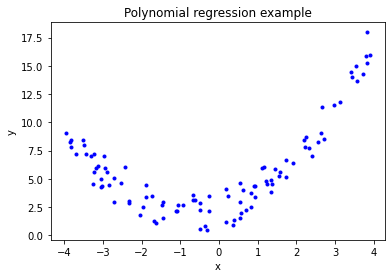

In [4]:
# Plot
plt.plot(X, y, 'b.')
plt.title('Polynomial regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's use the normal equations to find the $\theta$ minimizing $J(\theta)$:
$$\mathbf{\theta} = (X^\top X)^{-1}X^\top\mathbf{y}$$

First, we use ordinary linear regression:
$$h_\theta(x) = \theta_0 + \theta_1 x$$
Then, we use polynomial regression with $d=2$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$ 

## Hypothesis Function

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

In [5]:
def h(X, theta):
    return X.dot(theta)

## Regression Function

The Regression function can be created from normal equation.

$$\mathbf{\theta} = (X^\top X)^{-1}X^\top\mathbf{y}$$

In [6]:
def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

In [7]:
y.shape

(100, 1)

## Exercise 1.1 (2 points)

Create function RMSE (root mean squared error)
$$rms_{error} = \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{m}$$

Create function RMSE (root mean squared error)
$$rms_{error} = \sqrt{\frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{m}}$$

In [8]:
def rmse(y, y_pred):
    #error = np.sqrt(np.square(y-y_pred.T).sum()/y.shape)
    #error = np.sqrt(np.mean((y-y_pred)**2))
    error = np.sqrt(np.dot((y - y_pred).T, y - y_pred) / y.shape[0])
    #raise NotImplementedError()
    return error

In [9]:
print(rmse(np.array([1,1.1,2,-1]), np.array([1.1,1.3,1.5,0.1])))

# Test function: Do not remove
assert np.round(rmse(np.array([1,1.1,2,-0.1]), np.array([1.1,1.3,1.5,0.1])), 5) == np.round(0.29154759474226505, 5), "calculate rmse incorrect"
print("success!")
# End Test function

0.6144102863722254
success!


**Expect output:** 0.6144102863722254

## Simple Linear Model

In [10]:
# Add intercept column of all 1's
X_aug = np.insert(X, 0, 1, axis=1)

# Print first 5 rows of X
print(X_aug[0:5,:])

# Find optimal parameters
theta_slr = regression(X_aug, y)

# Predict y
y_pred_slr = h(X_aug, theta_slr)
print(y_pred_slr.shape)
print('Linear regression RMSE: %f' % rmse(y, y_pred_slr))

[[ 1.          0.39050803]
 [ 1.          1.72151493]
 [ 1.          0.82210701]
 [ 1.          0.35906546]
 [ 1.         -0.61076161]]
(100, 1)
Linear regression RMSE: 3.413803


## Exercise 1.2 (2 points)

From the simple linear model at above, create another Linear model by using **polynomial model with d=2**.
 - Create x data in <code>X_aug</code>
 - Find $\theta$ and input to <code>theta_pr</code>

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    
1. Use <code>np.insert</code> to
   - insert **"$x^{n-1}$"** when $n$ is number of $\theta$

In [11]:
# 1. Add constant column and x^2 column
X_aug = np.insert(X,0,1,axis=1)
X_aug = np.insert(X_aug,2,X[:,0]**2,axis=1)
# 2. Find optimal parameters 
theta_pr = regression(X_aug,y)
# YOUR CODE HERE
#raise NotImplementedError()

In [12]:
# Predict y 
y_pred_pr = h(X_aug, theta_pr)
print(X_aug[0:5,:])
print('Polynomial regression RMSE: %f' % rmse(y, y_pred_pr))

# Test function: Do not remove
assert np.array_equal(np.round(theta_pr.T), np.round([[1.90932595, 1.02311816, 0.71747835]])), "theta_pr are incorrect"
assert np.round(X_aug[10,1] ** 2, 5) == np.round(X_aug[10,2], 5), "X_aug are incorrect"
assert np.round(rmse(y, y_pred_pr) ** 2 * y.shape[0], 5) == np.round(np.dot((y - y_pred_pr).T, y - y_pred_pr), 5), "RMSE incorrect"
print("success!")
# End Test function

[[ 1.          0.39050803  0.15249652]
 [ 1.          1.72151493  2.96361366]
 [ 1.          0.82210701  0.67585993]
 [ 1.          0.35906546  0.12892801]
 [ 1.         -0.61076161  0.37302974]]
Polynomial regression RMSE: 0.986690
success!


**Expect output** \
[[ 1.          0.39050803  0.15249652]\
 [ 1.          1.72151493  2.96361366]\
 [ 1.          0.82210701  0.67585993]\
 [ 1.          0.35906546  0.12892801]\
 [ 1.         -0.61076161  0.37302974]]\
Polynomial regression RMSE: 0.986690

We see that the degree 2 polynomial fit is much better, reducing average error from 3.22 to 0.96.

Here's a plot of the predictions vs. observed data:

## Exercise 1.3 (2 points)

Do the **get_prediction function** to predict $\hat{y}$


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    
1. Use <code>np.insert</code> to
   - insert **"1"** in front of $x$
   - insert **"$x^{n-1}$"** when $n$ is number of $\theta$

    
2. Use **Hypothesis function** to get $\hat{y}$
</details>

In [13]:
def get_predictions(x, theta):
    # Change the shape of x to support the function
    x = np.array([x]).T
    x = np.insert(x,0,1,axis=1)
    while (x.shape[1]<theta.shape[0]):
        x= np.insert(x,x.shape[1],x[:,1]*x[:,-1],axis=1)
    y_hat = h(x,theta)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return y_hat

In [14]:
x_series = np.linspace(-4, 4, 1000)
y_series_slr = get_predictions(x_series, theta_slr)
y_series_pr = get_predictions(x_series, theta_pr)

print("y_series_slr:", y_series_slr[2:5].T)
print("y_series_pr:", y_series_pr[2:5].T)

# Test function: Do not remove
assert np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T, 5) is not None, "predict from theta_slr is incorrect"
assert np.round(get_predictions(np.array([1, 1, 0.1, 2]), theta_pr).T, 5) is not None, "predict from theta_pr is incorrect"
print("success!")
# End Test function

y_series_slr: [[2.72462183 2.73101513 2.73740842]]
y_series_pr: [[9.0812643  9.04632656 9.01147497]]
success!


**Expect output**:\
y_series_slr: [[2.72462183 2.73101513 2.73740842]]\
y_series_pr: [[9.0812643  9.04632656 9.01147497]]

## Plot X, y, and the two regression models

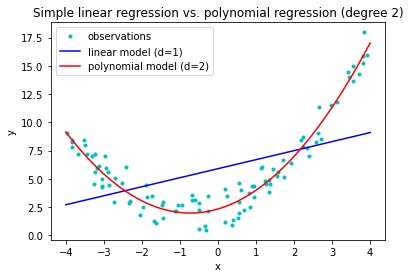

In [15]:
plt.plot(X[:,0], y, 'c.', label='observations')
plt.plot(x_series, y_series_slr, 'b-', label='linear model (d=1)')
plt.plot(x_series, y_series_pr, 'r-', label='polynomial model (d=2)')
plt.title('Simple linear regression vs. polynomial regression (degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Besides RMSE, let's also get the $R^2$ for our two models. Recall
\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}


## Exercise 1.4 (2 points)

Create $R^2$ from equation above

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary> Use <code>np.square</code>
</details>

In [16]:
def r_squared(y, y_pred):
    r_sqr = 1 -(np.square(y-y_pred).sum()/np.square(y-y_pred.mean()).sum())
    # YOUR CODE HERE
    #raise NotImplementedError()
    return r_sqr

In [17]:
print('Fit of simple linear regression model: %.4f' % r_squared(y, y_pred_slr))
print('Fit of polynomial regression model: %.4f' % r_squared(y, y_pred_pr))

# Test function: Do not remove
assert np.round(r_squared(np.array([1, 2, 3]), np.array([1, 2, 3]))) == np.round(1.0), "r_squared is incorrect"
assert np.round(r_squared(y, y_pred_pr), 4) == np.round(0.9353, 4), "r_squared is incorrect"
print("success!")
# End Test function

Fit of simple linear regression model: 0.2254
Fit of polynomial regression model: 0.9353
success!


**Expect output:**\
Fit of simple linear regression model: 0.2254\
Fit of polynomial regression model: 0.9353

Another useful analysis is to plot histograms of each model's residuals: 

## Exercise 1.5 (2 points)

Find error of
 - <code>error_slr</code> is error from simple linear regression
 - <code>error_pr</code> is error from polynomial linear regression

In [18]:
def residual_error(y, y_pred):
    error = y - y_pred
    # YOUR CODE HERE
    #raise NotImplementedError()
    return error

error_slr = residual_error(y, y_pred_slr)
error_pr = residual_error(y, y_pred_pr)

error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]


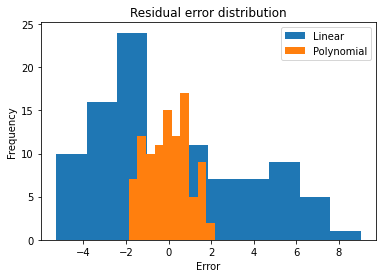

success!


In [19]:
# Plot distribution of residual error for each model
print("error_slr sample:", error_slr[0:5, 0].T)
print("error_pr sample:", error_pr[0:5, 0].T)

plt.hist(error_slr, bins=10, label = 'Linear')
plt.hist(error_pr, bins=10, label = 'Polynomial')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()
plt.show()

# Test function: Do not remove
assert np.array_equal(np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T),
                      np.round([[6.70364883, 13.09055058, 7.50201155, -1.27997835]])), "predict from theta_slr is incorrect"
assert np.array_equal(np.round(get_predictions(np.array([0, 7, 1.5, -0.3]), theta_pr).T),
                      np.round([[2.34050076, 42.14663283, 5.3284002, 2.10566904]])), "predict from theta_pr is incorrect"
print("success!")
# End Test function

**Expect output:**\
error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]\
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]

The residual plot shows clearly how much better the polynomial model is than the linear model.

## Example 2

Next, let's model some monthly sales data from Kaggle using polynomial regression with varying degree.

We will observe the effects of varying the degree of the polynomial regression fit on the prediction accuracy.

However, as models become more complex, we will encounter the issue of *overfitting*, in which a too-powerful model starts to model the noise in the specific
training set rather than the overall trend.

To ensure that we're not fitting the noise in the training set, we will split the data into seaparte train and test/validation datasets.
The training dataset will consist of 60% of the original observations, and the test dataset will consist of the remaining 40% of the observations.

For various polynomial degrees, we'll estimate optimal parameters $\theta$, then we'll use the test dataset to measure accuracy of the optimized model.

In [20]:
# Import CSV
data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)

# Extract headers
headers = data[0,:]
print("Headers:", headers)

# Extract raw data
data = np.array(data[1:,:], dtype=float);
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
data_norm = (data-mean)/std

# Extract y column from raw data
y_index = np.where(headers == 'sale amount')[0][0];
y_data = data[:,y_index];

# Extract x column (just the month) from raw data
month_index = np.where(headers == 'month')[0][0]
# print(year_index, month_index)
X_data = data[:,[month_index]];
m = X_data.shape[0]
n = X_data.shape[1]
X_data = X_data.reshape(m, n)

print('Extracted %d monthly sales records' % m)
print(X_data.shape)
print(y_data.shape)

Headers: ['year' 'month' 'sale amount']
Extracted 240 monthly sales records
(240, 1)
(240,)


## Plot the data

Plot 3D by using Axes3D

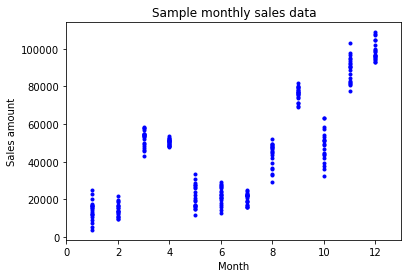

In [21]:
# Plot the data
fig = plt.figure()
xx1 =X_data[:,0]
zz1 =y_data

plt.plot(xx1, zz1, 'b.')
plt.xlim(0, 13)
plt.xlabel('Month')
plt.ylabel('Sales amount')
plt.title('Sample monthly sales data')
plt.show()

## Exercise 1.6 (2 points)

Partion <code>X_data</code> and <code>y_data</code> into training and test datasets
 - Do train set as 60% of all data
 - Other are test set
 - dataset must be shuffle
 
You can use <link>[random.shuffle](https://www.w3schools.com/python/ref_random_shuffle.asp)</link> to shuffle index of dataset

In [22]:
percent_train = .6

def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # do yourself follow the instruction
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    random.shuffle(idx)
    m_train = int(y.shape[0] * percent_train)
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:y.shape[0]+1]
    
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test

In [23]:
idx, X_train, y_train, X_test, y_test = partition(X_data, y_data, percent_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_data[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_data[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_data[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_data[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 1)
(144,)
(96, 1)
(96,)
[ 26  75  51 162]
success!


**Expect output:**\
(144, 1)\
(144,)\
(96, 1)\
(96,)\
[ 26  75  51 162]

## Exercise 1.7 (2 points)

Create <code>x_polynomial</code> function
$$X=[1, x, x^2, ..., x^{n}]$$

when $n$ is number of polynomial set

In [24]:
def x_polynomial(x, n):
    X = np.ones((x.shape[0], 1)) 
    for i in range(n):
        X = np.concatenate((X,x**(i+1)), axis = 1)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return X

In [25]:
print(x_polynomial(np.array([[3],[2]]), 5))
print(x_polynomial(np.array([[3],[2]]), 5).shape)

Xi_train = x_polynomial(X_train, 1)    
Xi_test = x_polynomial(X_test, 1)

# Test function: Do not remove
assert x_polynomial(np.array([[2],[3]]), 5).shape[1] == 5 + 1, "Size of polynomial incorrect"
assert np.array_equal(np.round(x_polynomial(np.array([[2],[3]]), 5), 3), 
                      np.round([[1, 2, 4, 8, 16, 32], [1, 3, 9, 27, 81, 243]],3)), "Polynomial are wrong."
print("success!")
# End Test function

[[  1.   3.   9.  27.  81. 243.]
 [  1.   2.   4.   8.  16.  32.]]
(2, 6)
success!


**Expect output:**\
[[  1.   3.   9.  27.  81. 243.]\
 [  1.   2.   4.   8.  16.  32.]]\
(2, 6)

## Exercise 1.8 (2 points)

Create <code>cost</code> function ($J$)

In [26]:
def cost(theta,X,y):
    J = 1 / 2 / X.shape[0] * (h(X,theta)-y).T.dot(h(X,theta)-y)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return J

In [27]:
# calculate theta
theta = regression(Xi_train, y_train)

# calculate cost in train
J_train = cost(theta, Xi_train, y_train)

y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert type(J_train) == np.float64, "Cost function size must be 1"
assert np.round(J_train, 3) == np.round(174395635.44334993, 3), "Cost function in train set are wrong"
assert np.round(J_test, 3) == np.round(196382485.91395777, 3), "Cost function in test set are wrong"
print("success!")
# End Test function

J_train: 174395635.44334996
J_test: 196382485.91395798
success!


**Expect output:**\
J_train: 174395635.44334993\
J_test: 196382485.91395777

## Mixed together

Build models of degree 1 to max_degree

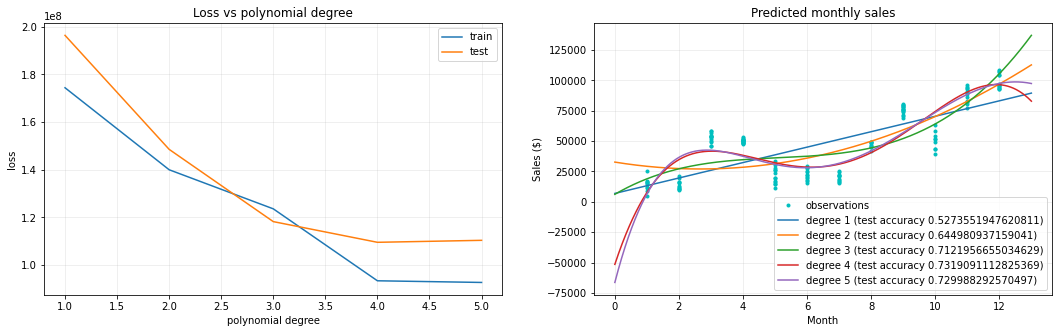

In [28]:
max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Take some time to undserstand the code. You should see that training loss falls as the degree of the polynomial increases. However, depending on your particular train/test split of the data, you may observe at $d=4$ or $d=5$ that test loss starts to increase. This is the phenomenon of overfitting!

If you don't see any evidence of overfitting, you might regenerate the test/train splits (rerun the previous cell as well as the training cell).

You may also increase max_degree to a point. However, without normalization of the data, the matrix $\texttt{X}^\top\texttt{X}$ we invert in the solution to the normal equations will become numerically close to singularity, and you will observe unstable solutions. The result is usually a parameter vector $\theta$ that is suboptimal that gives poor results on both the training set and test set.

If you want to evaluate the numerial stability of the correlation matrix $\texttt{X}^\top\texttt{X}$, try this code:

In [29]:
corr = Xi_train.T.dot(Xi_train)
print('Correlation matrix:', corr)
cond = np.linalg.cond(corr)
print('Condition number: %0.5g' % cond)

Correlation matrix: [[1.44000000e+02 9.34000000e+02 7.73800000e+03 7.24420000e+04
  7.25962000e+05 7.58679400e+06]
 [9.34000000e+02 7.73800000e+03 7.24420000e+04 7.25962000e+05
  7.58679400e+06 8.15402980e+07]
 [7.73800000e+03 7.24420000e+04 7.25962000e+05 7.58679400e+06
  8.15402980e+07 8.94004282e+08]
 [7.24420000e+04 7.25962000e+05 7.58679400e+06 8.15402980e+07
  8.94004282e+08 9.94854740e+09]
 [7.25962000e+05 7.58679400e+06 8.15402980e+07 8.94004282e+08
  9.94854740e+09 1.11986452e+11]
 [7.58679400e+06 8.15402980e+07 8.94004282e+08 9.94854740e+09
  1.11986452e+11 1.27211760e+12]]
Condition number: 6.5793e+12


Read more about the condition number on <link>[Wikipedia](https://en.wikipedia.org/wiki/Condition_number)</link>. Roughly speaking, if our condition number is $10^k$, we may lose up to $k$ digits of accuracy in the inverse of the matrix. If $k=12$ as above, then we have an extremely poorly conditioned problem, because the IEEE 64 bit floating point representation of reals we're using in Python only has around 16 digits of accuracy (see <link>[Wikipedia's page on IEEE floating point numbers](https://en.wikipedia.org/wiki/IEEE_754)</link>).

One way to improve the numerical conditioning of the problem is normalization. If the values of the variable's we're correlating in this matrix have relatively small positive and negative values, the condition number of the correlation matrix will be much smaller and you'll get better results.

Take some time to undserstand the code. Depending on your random test/train split, you should see that training loss falls as the degree of the polynomial increases.
However, you may observe at some point that test loss starts to increase, and you may see some very strange behavior of the model function beyond the range 1-12.
If not, go ahead and increase the variable `max_degree` until you see an increase in test loss. This is the phenomenon of overfitting!

## In-lab exercise

During the lab session, you should perform the following exercises:
1. Add the `year` variable from the monthly sales dataset to your simple linear regression model and quantify whether including it improves test set performance. Show
   the observations and predictions in a 3D surface plot.
2. Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting
   or not.

## Exercise 2.1 (2 points)

Import **MonthlySales_data.csv** file into <code>data_csv</code> and extract **headers**  at the top of <code>data_csv</code> into <code>headers_csv</code>

In [30]:
data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)
headers_csv = data[0,:]

print("Headers:", headers_csv)
data_csv =np.array(data[1:,:], dtype=float)
# # YOUR CODE HERE
# raise NotImplementedError()

Headers: ['year' 'month' 'sale amount']


In [31]:
print(headers_csv)
print(data_csv[:5])

# Test function: Do not remove
assert type(data_csv[0,0]) == np.float64, "You must remove the header"
assert headers_csv.shape[0] == 3, "Headers must have 3 values"
assert type(headers_csv[0]) == np.str_, "Headers must be string"
assert np.round(data_csv[30, 2], 3) == np.round(2.222027e+04, 3), "Data is incorrect"
print("success!")
# End Test function

['year' 'month' 'sale amount']
[[1.995000e+03 1.000000e+00 1.238611e+04]
 [1.995000e+03 2.000000e+00 1.532923e+04]
 [1.995000e+03 3.000000e+00 5.800217e+04]
 [1.995000e+03 4.000000e+00 5.130520e+04]
 [1.995000e+03 5.000000e+00 1.645247e+04]]
success!


**Expect output**:\
['year' 'month' 'sale amount']\
[[1.995000e+03 1.000000e+00 1.238611e+04]\
 [1.995000e+03 2.000000e+00 1.532923e+04]\
 [1.995000e+03 3.000000e+00 5.800217e+04]\
 [1.995000e+03 4.000000e+00 5.130520e+04]\
 [1.995000e+03 5.000000e+00 1.645247e+04]]

## Exercise 2.2 (2 points)

- Extract **sale amount** column into <code>y_csv</code>
- Extract **year** and **month** columns into <code>X_csv</code> by use **year** at column index 0 and **month** at column index 1

In [32]:
# Extract y column from raw data
# Extract x column (year and month) from raw data
y_index =  np.where(headers == 'sale amount')[0][0];
print(y_index)
y_csv = data_csv[:,y_index]
x_index =  np.where(headers == 'year')[0][0];
#x_index1 =  np.where(headers == 'month')[0][0];
print(x_index)
X_csv = data_csv[:,x_index:2]
# YOUR CODE HERE
#raise NotImplementedError()

2
0


In [33]:
m = X_csv.shape[0]
n = X_csv.shape[1]
X_csv = X_csv.reshape(m, n)
print('Extracted %d sales records' % m)
print('number of x set:', n)

# Test function: Do not remove
assert m == 240, "Sales records incorrect"
assert n == 2, "Need to extract 2 columns of X set"
assert np.max(X_csv[:,0]) == 2014 and np.min(X_csv[:,0]) == 1995, "Year is filled wrong column"
assert np.max(X_csv[:,1]) == 12 and np.min(X_csv[:,1]) == 1, "Month is filled wrong column "
print("success")
# End Test function

Extracted 240 sales records
number of x set: 2
success


**Expect output**:\
Extracted 240 sales records\
number of x set: 2

## Exercise 2.3 (2 points)

- Plot 3D graph using <code>mpl_toolkits.mplot3d</code>

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
Please see https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html for example
</details>

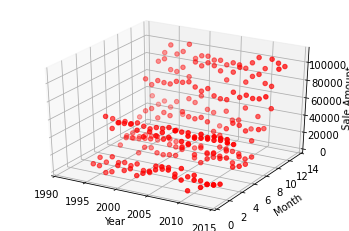

In [34]:
# Plot the data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = X_csv[:,0]
y_month = X_csv[:,1]
z_sale = y_csv

# 3. plot by using scatter
ax.scatter(x_year, y_month, z_sale, color='r')
# 4. set x, y, z label
# YOUR CODE HERE
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Sale Amount', rotation=90)
ax.set_xlim(1990, 2015)
ax.set_ylim(0, 14)

# 4. set x, y, z label
# YOUR CODE HERE
#raise NotImplementedError()

plt.show()

In [35]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expect output:**\
<img src="lab02-01.png">

## Exercise 2.4 (2 points)

Extract data to 60% of training set and 40% of test set with shuffle

 - You can use <code>partitions</code> function or create your new function and make sure that you must use <code>random.seed(1412)</code> in the code (to make sure that the result will be the same as the expect result)
 - Please use <code>idx, X_train, y_train, X_test, y_test</code> for the answer result.

In [36]:
idx, X_train, y_train, X_test, y_test = partition(X_csv,y_csv,percent_train = 0.6)
# YOUR CODE HERE
#raise NotImplementedError()

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_csv[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_csv[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_csv[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_csv[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 2)
(144,)
(96, 2)
(96,)
[ 26  75  51 162]
success!


**Expect output**:\
(144, 2)\
(144,)\
(96, 2)\
(96,)\
[ 26  75  51 162]

## Exercise 2.5 (2 points)

- Create <code>Xi_train, Xi_Test</code>. X sets must be polynomial of $n=1$.
- Calculate <code>theta</code>
- Calculate <code>y_pred_test</code>
- Calculate cost function $J$ from train and test set

In [38]:
Xi_train, Xi_test =  x_polynomial(X_train, 1),  x_polynomial(X_test, 1)   
theta = regression(Xi_train, y_train)

J_train = cost(theta, Xi_train, y_train)

#y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

y_pred_test =  h(Xi_test, theta)
#J_train, J_test = None, None

# YOUR CODE HERE
#raise NotImplementedError()

In [39]:
print("Xi_train[:3]:", np.round(Xi_train[:3], 2))
print("Xi_test[:3]:", np.round(Xi_test[:3], 2))
print("theta:", theta)
print("y_pred_test[:5]:", np.round(y_pred_test[:5].T, 2))
print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert np.array_equal(np.round(theta, 3), np.round([5.74503812e+05, -2.83158807e+02, 6.37579347e+03],3)), "Regression theta is incorrect"
assert np.round(J_train, 0) == np.round(172968387.44854635, 0), "Train cost is incorrect"
assert np.round(J_test, 0) == np.round(204275431.7643744, 0), "Test cost is incorrect"
print("success")
# End Test function

Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]
 [1.000e+00 2.004e+03 3.000e+00]
 [1.000e+00 2.002e+03 6.000e+00]]
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]
 [1.000e+00 1.997e+03 5.000e+00]
 [1.000e+00 2.006e+03 1.100e+01]]
theta: [ 5.74503812e+05 -2.83158807e+02  6.37579347e+03]
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]
J_train: 172968387.44854635
J_test: 204275431.76439014
success


**Expect output**:\
Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]\
 [1.000e+00 2.004e+03 3.000e+00]\
 [1.000e+00 2.002e+03 6.000e+00]]\
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]\
 [1.000e+00 1.997e+03 5.000e+00]\
 [1.000e+00 2.006e+03 1.100e+01]]\
theta: [5.74503812e+05 -2.83158807e+02  6.37579347e+03]\
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]\
J_train: 172968387.44854635\
J_test: 204275431.7643744

## Exercise 2.6 (2 points)

Create **mesh grid point** to plot **surface**

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
Create Mesh grid from numpy.meshgrid (link: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)\
</details>

In [40]:
# 1. Create mesh grid x_mesh, y_mesh
#    Hint: this step do in input X dataset only (year, and month series)
# 1.1 use numpy.linspace() to generate x_series and y_series
#     - do x_series in between min(year) - 1 to max(year) + 1
#     - do y_series in between min(month) - 1 to max(month) + 1
#     - num_linspace = 100
# 1.2 use numpy.meshgrid() to generate x_mesh, and y_mesh
# 1.3 merge x_mesh and y_mesh to be xy_mesh
num_linspace = 100
x_series, y_series =  np.linspace(min(X_csv[:,0])-1, max(X_csv[:,0])+1, num_linspace),np.linspace(min(X_csv[:,1])-1, max(X_csv[:,1])+1, num_linspace)
x_mesh, y_mesh =np.meshgrid(x_series, y_series)
xy_mesh = np.dstack((x_mesh, y_mesh))
# 2. predict output from xy_mesh to be z_series
#    Hint: use mesh_predictions function instead of get_prediction
def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    theta = theta.reshape(-1,1)
    y = x@theta
    return y
z_series = mesh_predictions(xy_mesh, theta).reshape(num_linspace, -1)

# YOUR CODE HERE
#raise NotImplementedError()

In [41]:
print("xy_mesh.shape", xy_mesh.shape)
print("z_series.shape", z_series.shape)
#print("xy_mesh", xy_mesh)
#print("z_series", z_series)

# Test function: Do not remove
assert xy_mesh.shape == (num_linspace, num_linspace, 2), "mesh shape is incorrect"
assert z_series.shape == (num_linspace, num_linspace), "z_series is incorrect"
print("success")
# End Test function

xy_mesh.shape (100, 100, 2)
z_series.shape (100, 100)
success


**Expect output**:\
xy_mesh.shape (100, 100, 2)\
z_series.shape (100, 100)

## Exercise 2.6 (2 points)

Plot **surface** of theta with the dataset points from xy_mesh and z_series above.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
You can use Axes3D.plot_surface in the link: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
</details>

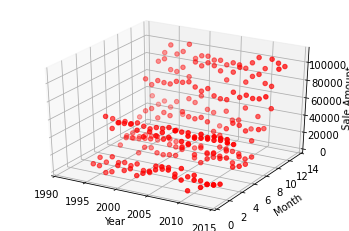

In [42]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = X_csv[:,0]
y_month = X_csv[:,1]
z_sale = y_csv

# 3. plot by using scatter
ax.scatter(x_year, y_month, z_sale, color='r')
# 4. set x, y, z label
# YOUR CODE HERE
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Sale Amount', rotation=90)
ax.set_xlim(1990, 2015)
ax.set_ylim(0, 14)
# 3. plot by using scatter
# 4. set x, y, z label
#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series

# YOUR CODE HERE
#raise NotImplementedError()

plt.show()

In [43]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expect result:**
<img src="lab02-02.png">

## Exercise 2.7 (20 points)

Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting or not.

In [44]:
x = x_polynomial(X_train, 2)
print(x[:3])


[[1.000000e+00 2.003000e+03 1.100000e+01 4.012009e+06 1.210000e+02]
 [1.000000e+00 2.004000e+03 3.000000e+00 4.016016e+06 9.000000e+00]
 [1.000000e+00 2.002000e+03 6.000000e+00 4.008004e+06 3.600000e+01]]


3D plot: Polynomial degree 2 



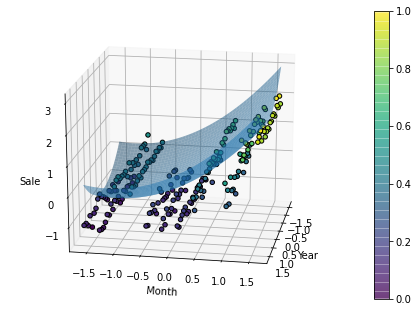

3D plot: Polynomial degree 2 



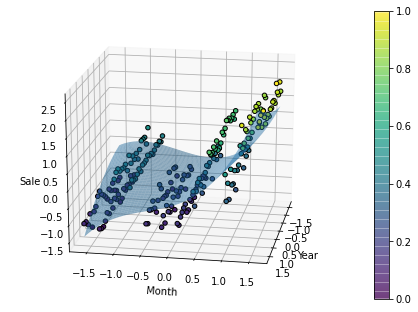

In [45]:
data_csv = (data_csv-np.mean(data_csv, axis = 0))/np.std(data_csv, axis = 0)
y_label = 'sale amount';
y_index = np.where(headers == y_label)[0][0];
y = data_csv[:,y_index];                      
X = data_csv[:,0:y_index];                 
m = data_norm.shape[0]

percent_train = .6
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_csv[train_idx, 0:y_index];
X_test = data_csv[test_idx, 0:y_index];
y_train = data_csv[train_idx, y_index];
y_test = data_csv[test_idx, y_index];

#=============================

# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    print("3D plot: Polynomial degree 2","\n")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)
    
    x_year = data_csv[:, 0]
    y_month = data_csv[:, 1]
    z_sale = data_csv[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x_year,y_month, z_sale,edgecolors='black', c=data_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('Year')
    ax.set_ylabel('Month')
    ax.set_zlabel('Sale')

    # plot observation
    x_series = np.linspace(min(data_csv[:,0]), max(data_csv[:,0]),len(y_csv))
    y_series = np.linspace(min(data_csv[:,1]), max(data_csv[:,1]),len(y_csv))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)

    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

## Exercise 3 Take-home exercise (50 points)

Using the dataset you played with for the take-home exercise in Lab 01, perform the same analysis. You won't be able to visualize the model well, as you will have more
than two inputs, but try to give some idea of the performance of the model visually. Also, depending on the number of variables in your dataset, you may not be able to
increase the polynomial degree beyond 2. Discuss whether the polynomial model is better than the linear model and whether you observe overfitting.

### Write all code in youre new file

## To turn in

Before the next lab, turn in a brief report in the form of a Jupyter notebook documenting your work in the lab and the take-home exercise, along with your observations
and discussion.

In [ ]:
%reset

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

**Reading data Housing_data.txt and extract data for polynomial regression**

In [2]:
import numpy as np
data_x = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);
print(data_x.shape)

headers_csv = data_x[0,:]

print("Headers:", headers_csv)
data_csv =np.array(data_x[1:,:], dtype=float)

(48, 3)
Headers: ['space' 'beds' 'price']


In [5]:
X_s_csv = data_csv[:,[0]]
X_b_csv = data_csv[:,[1]]
y_csv = data_csv[:,-1]

m = X_s_csv.shape[0]
n = X_s_csv.shape[1]
X_s_csv = X_s_csv.reshape(m, n)

print('Extracted %d housing sales records' % m)
print(X_s_csv.shape)
print(X_b_csv.shape)
print(y_csv.shape)

Extracted 47 housing sales records
(47, 1)
(47, 1)
(47,)


**Hypothesis function** 

**Regression Function**

**RMSE**

**r_squared**


In [16]:
def h(X, theta):
    return X.dot(theta)

def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

def x_polynomial(x, n):
    X = np.ones((x.shape[0], 1)) 
    for i in range(n):
        X = np.concatenate((X,x**(i+1)), axis = 1)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return X

def get_predictions(x, theta):
    # Change the shape of x to support the function
    x = np.array([x]).T
    x = np.insert(x,0,1,axis=1)
    while (x.shape[1]<theta.shape[0]):
        x= np.insert(x,x.shape[1],x[:,1]*x[:,-1],axis=1)
    y_hat = h(x,theta)
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return y_hat

def r_squared(y, y_pred):
    r_sqr = 1 -(np.square(y-y_pred).sum()/np.square(y-y_pred.mean()).sum())
    # YOUR CODE HERE
    #raise NotImplementedError()
    return r_sqr

def cost(theta,X,y):
    y_pred = X @ theta
    dy= y- y_pred
    # YOUR CODE HERE
    J= 1/(2* X.shape[0]) * (dy. T @ dy)
    #raise NotImplementedError()
    return J

def rmse(y, y_pred):

    error=np.sqrt(np.sum((y- y_pred)**2)/y.shape[0])
    return error

In [20]:
def simple_lin_reg(X, y):
    
    X_aug = np.insert(X, 0, 1, axis=1)

    # Print first 5 rows of X
    print(X_aug[0:5,:])

    # Find optimal parameters
    theta_slr = regression(X_aug, y)

    # Predict y
    y_pred_slr = h(X_aug, theta_slr)
    
    return X_aug, theta_slr, y_pred_slr

X_aug, theta_linear, y_pred_linear = simple_lin_reg(X_s_csv,y_csv)
X1_aug, theta1_linear, y1_pred_linear = simple_lin_reg(X_b_csv,y_csv)


print('Linear regression RMSE: %f' % rmse(y_csv, y_pred_linear))
print('Linear regression RMSE: %f' % rmse(y_csv, y1_pred_linear))

[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]
 [1.000e+00 3.000e+03]]
[[1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 2.]
 [1. 4.]]
Linear regression RMSE: 64158.128720
Linear regression RMSE: 110947.114593


In [22]:
def polynomial_reg(X, y):
    
    X_aug= np.insert(X, X.shape[1], (X**2).T, axis=1)
    X_aug= np.insert(X_aug, 0, 1, axis=1)
    # 2. Find optimal parameters 
    theta_pr = regression(X_aug, y)
    # YOUR CODE HERE
    y_pr = h(X_aug, theta_pr)
    #raise NotImplementedError()
    print(X_aug[:5, :])
    
    return theta_pr, y_pr

theta_poly, y_pred_poly = polynomial_reg(X_s_csv,y_csv)
theta1_poly, y1_pred_poly = polynomial_reg(X_b_csv,y_csv)


print('Polynomial regression RMSE: %f' % rmse(y_csv, y_pred_poly))
print('Polynomial regression RMSE: %f' % rmse(y_csv, y1_pred_poly))

[[1.000000e+00 2.104000e+03 4.426816e+06]
 [1.000000e+00 1.600000e+03 2.560000e+06]
 [1.000000e+00 2.400000e+03 5.760000e+06]
 [1.000000e+00 1.416000e+03 2.005056e+06]
 [1.000000e+00 3.000000e+03 9.000000e+06]]
[[ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  3.  9.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]]
Polynomial regression RMSE: 64150.526904
Polynomial regression RMSE: 109662.266361


In [13]:
def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # do yourself follow the instruction
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    random.shuffle(idx)
    m_train = int(y.shape[0] * percent_train)
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:y.shape[0]+1]
    
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test
idx, X_train, y_train, X_test, y_test = partition(X_s_csv,y_csv,percent_train = 0.6)
idx, X_train1, y_train1, X_test1, y_test1 = partition(X_b_csv,y_csv,percent_train = 0.6)

**Linear and Polynomial regression for both input**

In [35]:
x_series = np.linspace(X_s_csv.min()-1000, X_s_csv.max() +1000, 1000)
#x1_series=  np.linspace(X_b_csv.min()-1000, X_b_csv.max() +1000, 1000)
x1_series=np.linspace(0, 5, 1000)
# for space in feets
y_series_linear = get_predictions(x_series, theta_linear)
y_series_poly = get_predictions(x_series, theta_poly)

# for number of rooms
y1_series_linear = get_predictions(x1_series, theta1_linear)
y1_series_poly = get_predictions(x1_series, theta1_poly)

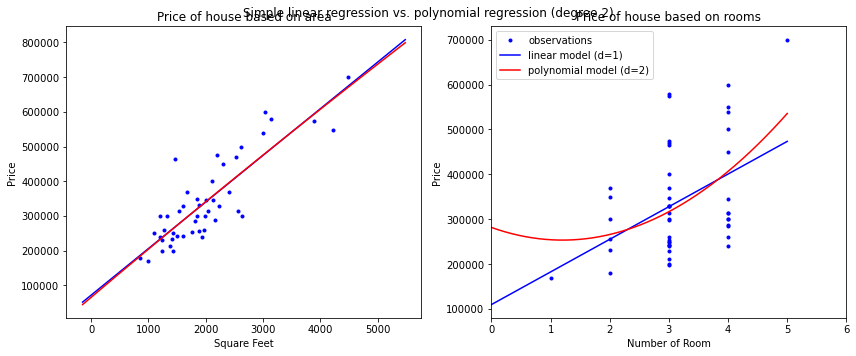

In [36]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (12, 5))
plt.suptitle('Simple linear regression vs. polynomial regression (degree 2)')
ax1.plot(X_s_csv, y_csv, 'b.', label='observations')
ax1.plot(x_series, y_series_linear, 'b-', label='linear model (d=1)')
ax1.plot(x_series, y_series_poly, 'r-', label='polynomial model (d=2)')
#ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_xlabel('Square Feet')
ax1.set_ylabel('Price')
ax1.set_title('Price of house based on area')


ax2.plot(X_b_csv, y_csv, 'b.', label='observations')
ax2.plot(x1_series, y1_series_linear, 'b-', label='linear model (d=1)')
ax2.plot(x1_series, y1_series_poly, 'r-', label='polynomial model (d=2)')
ax2.set_xlim(0, 6)
ax2.set_xlabel('Number of Room')
ax2.set_ylabel('Price')
ax2.set_title('Price of house based on rooms')
plt.tight_layout()
plt.legend()
plt.show()

**Calculating R2**

In [42]:

print('Fit of simple linear regression model:', r_squared(y_csv, y_pred_linear))
print('Fit of polynomial regression model:',  r_squared(y_csv, y_pred_poly))

print('Fit of simple linear regression model_nr: ',  r_squared(y_csv, y1_pred_linear))
print('Fit of polynomial regression model_nr:',  r_squared(y_csv, y1_pred_poly))

Fit of simple linear regression model: 0.7310037839755306
Fit of polynomial regression model: 0.7310675245698297
Fit of simple linear regression model_nr:  0.19559489565340504
Fit of polynomial regression model_nr: 0.21411820590880815


**varying degree of polynomial regression For train and test set**

In [43]:
def partition(X, y, percent_train):
    # 1. create index list
    idx = np.arange(0,y.shape[0])
    random.seed(1412)   # just make sure the shuffle always the same please do not remove
    # do yourself follow the instruction
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    random.shuffle(idx)
    m_train = int(y.shape[0] * percent_train)
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:y.shape[0]+1]
    
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test
idx, X_train, y_train, X_test, y_test = partition(X_s_csv,y_csv,percent_train = 0.6)
idx, X_train1, y_train1, X_test1, y_test1 = partition(X_b_csv,y_csv,percent_train = 0.6)

In [44]:
Xi_train, Xi_test =  x_polynomial(X_train, 1),  x_polynomial(X_test, 1)   
theta = regression(Xi_train, y_train)

J_train = cost(theta, Xi_train, y_train)

#y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

y_pred_test =  h(Xi_test, theta)
print("J_train_square",J_train)
print("J_test_feet",J_test)

J_train_square 1587200666.0479681
J_test_feet 2775303425.680727


In [45]:
Xi_train, Xi_test =  x_polynomial(X_train1, 1),  x_polynomial(X_test1, 1)   
theta = regression(Xi_train, y_train)

J_train = cost(theta, Xi_train, y_train)

#y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

y_pred_test =  h(Xi_test, theta)
print("J_train_bedroom",J_train)
print("J_test_bedroom",J_test)

J_train_bedroom 5207731436.719661
J_test_bedroom 8152058453.672867


**prediction based on area of housing**

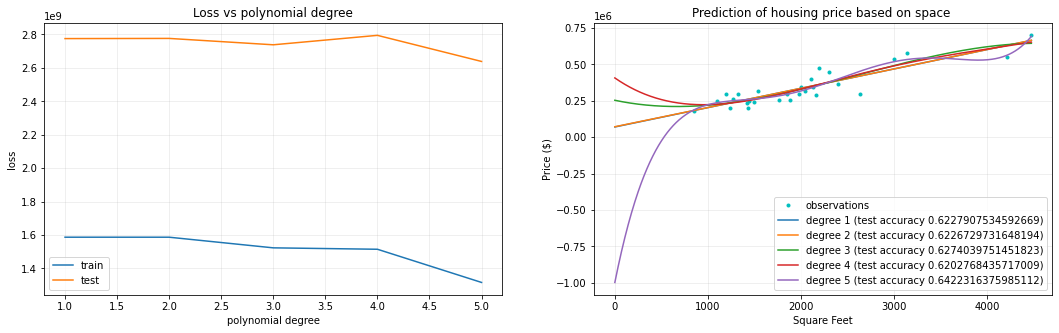

In [46]:
max_degree =5


J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, X_s_csv.max(), 1000)
    #print(x_series.shape, theta.shape)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Prediction of housing price based on space ')
plt2.set_xlabel('Square Feet')
plt2.set_ylabel('Price ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()

**Prediction based on number of rooms**

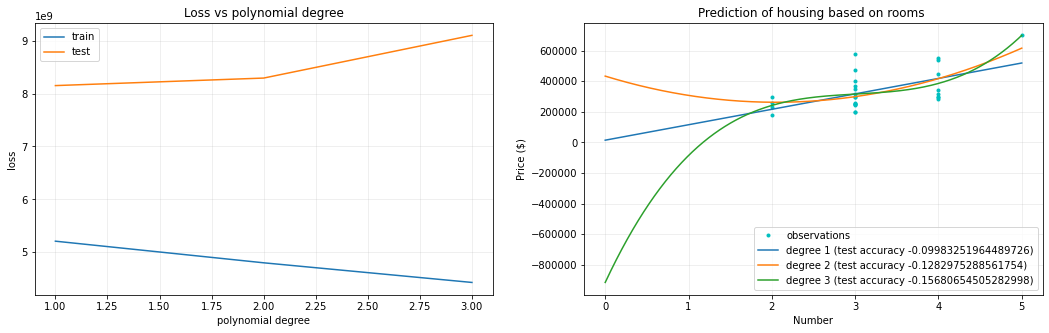

In [47]:
max_degree =3


J_train1 = np.zeros(max_degree)
J_test1 = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train1, y_train1, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train1 = x_polynomial(X_train1, i)    
    Xi_test1 = x_polynomial(X_test1, i);
    theta1 = regression(Xi_train1, y_train1)    
    J_train1[i-1] = cost(theta1, Xi_train1, y_train1)
    y_pred_test1 = h(Xi_test1, theta1)
    J_test1[i-1] = cost(theta1, Xi_test1, y_test1)
    
    # Plot
    x_series1 = np.linspace(0, X_b_csv.max(), 1000)
    #print(x_series.shape, theta.shape)
    y_series1 = get_predictions(x_series1, theta1)
    plt2.plot(x_series1, y_series1, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test1, y_pred_test1)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train1, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test1, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Prediction of housing based on rooms ')
plt2.set_xlabel('Number')
plt2.set_ylabel('Price ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

The number of rooms and the cost of housing don't seem to fit any polynomial degree particularly well. I think it may be due to  small dataset.

In [49]:
X_csv= data_csv[:,:-1]
y_csv= y_csv
train_perc=0.6
idx= np.arange(0, y_csv.shape[0])
random.seed(1412)
random.shuffle(idx)
train_idx = idx[0: int(len(idx)*train_perc)]
test_idx= idx[int(len(idx)*train_perc):]

X_train = X_csv[train_idx,:]
y_train = y_csv[train_idx]

X_test = X_csv[test_idx,:]
y_test= y_csv[test_idx]

In [50]:
Xi_train, Xi_test = np.insert(X_train, 0, 1, axis=1), np.insert(X_test, 0, 1, axis=1)#x_polynomial(X_train, 1), x_polynomial(X_test, 1) 
theta =  regression(Xi_train, y_train)
y_pred_test =  h(Xi_test, theta)
J_train, J_test = cost(theta, Xi_train, y_train), cost(theta, Xi_test, y_test)
print("Xi_train[:3]:", np.round(Xi_train[:3], 2))
print("Xi_test[:3]:", np.round(Xi_test[:3], 2))
print("theta:", theta)
print("y_pred_test[:5]:", np.round(y_pred_test[:5].T, 2))
print("J_train:", J_train)
print("J_test:", J_test)

Xi_train[:3]: [[1.000e+00 2.162e+03 4.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 2.104e+03 3.000e+00]]
Xi_test[:3]: [[1.000e+00 1.811e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]]
theta: [66140.15125289   131.69615423  2081.94069183]
y_pred_test[:5]: [312969.65 473638.96 405050.46 264398.97 332855.77]
J_train: 1586534107.3091235
J_test: 2796674293.454625


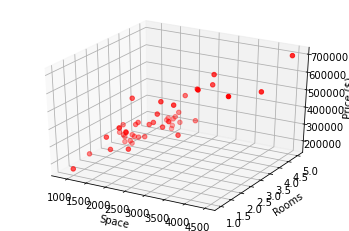

In [53]:
# Plot the data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = data_csv[:,0]
y_month =  data_csv[:,1]
z_sale =  data_csv[:,-1]

# 3. plot by using scatter
ax.scatter(x_year, y_month, z_sale, color='r')
# 4. set x, y, z label
ax.set_xlabel('Space')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price ($)')
# YOUR CODE HERE
#raise NotImplementedError()

plt.show()

In [51]:
num_linspace = 100
x_series, y_series = np.linspace(min(X_csv[:,0])-1, max(X_csv[:,0])+1, 100), np.linspace(min(X_csv[:,1])-1, max(X_csv[:,1])+1, 100)
x_mesh, y_mesh = np.meshgrid(x_series, y_series)
#xy_mesh = np.stack([x_mesh, y_mesh])
xy_mesh=np.concatenate((x_mesh.reshape(100,100,1), y_mesh.reshape(100,100,1)), axis = 2)

print(xy_mesh.shape)

# 2. predict output from xy_mesh to be z_series
#    Hint: use mesh_predictions function instead of get_prediction
def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    #print(x)
    theta = theta.reshape(-1,1)
    #print(theta.shape)
    y = x@theta
    return y
z_series = mesh_predictions(xy_mesh, theta)[:, :, 0]

(100, 100, 2)


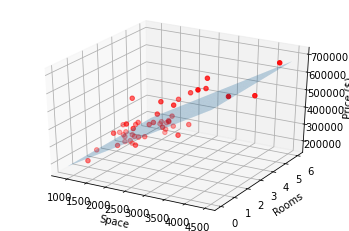

In [52]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = data_csv[:, 0]
y_month = data_csv[:, 1]
z_sale = y_csv[:]
# 3. plot by using scatter
# 4. set x, y, z label
#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series
# 3. plot by using scatter
ax.scatter( x_year,y_month, z_sale, color='r')
# 4. set x, y, z label
ax.set_xlabel('Space')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price ($)')

ax.plot_surface( x_mesh, y_mesh, z_series, alpha=0.3)
# YOUR CODE HERE
#raise NotImplementedError()

plt.show()

3D plot: Polynomial degree 2 

(47, 47) (47, 47)
yy...: [[-1.58650446 -1.57484767 -1.56433095 -1.55495431 -1.54671773 -1.53962123
  -1.5336648  -1.52884845 -1.52517216 -1.52263595 -1.52123982 -1.52098375
  -1.52186776 -1.52389183 -1.52705599 -1.53136021 -1.5368045  -1.54338887
  -1.55111331 -1.55997783 -1.56998241 -1.58112707 -1.5934118  -1.60683661
  -1.62140148 -1.63710643 -1.65395145 -1.67193654 -1.69106171 -1.71132695
  -1.73273226 -1.75527764 -1.7789631  -1.80378862 -1.82975422 -1.8568599
  -1.88510564 -1.91449146 -1.94501735 -1.97668331 -2.00948935 -2.04343545
  -2.07852163 -2.11474789 -2.15211421 -2.19062061 -2.23026708]]
x_mesh....: [[-1.46104938 -1.36078759 -1.26052579 -1.16026399 -1.0600022  -0.9597404
  -0.8594786  -0.75921681 -0.65895501 -0.55869321 -0.45843142 -0.35816962
  -0.25790783 -0.15764603 -0.05738423  0.04287756  0.14313936  0.24340116
   0.34366295  0.44392475  0.54418655  0.64444834  0.74471014  0.84497194
   0.94523373  1.04549553  1.14575733  1.24601912  1.346

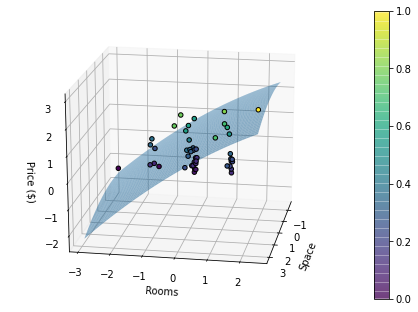

3D plot: Polynomial degree 3 

(47, 47) (47, 47)
yy...: [[-5.74033091 -5.74642848 -5.73797728 -5.71497733 -5.67742862 -5.62533115
  -5.55868493 -5.47748995 -5.38174622 -5.27145373 -5.14661248 -5.00722248
  -4.85328371 -4.6847962  -4.50175992 -4.30417489 -4.0920411  -3.86535856
  -3.62412726 -3.3683472  -3.09801839 -2.81314082 -2.51371449 -2.1997394
  -1.87121556 -1.52814297 -1.17052161 -0.7983515  -0.41163264 -0.01036501
   0.40545137  0.8358165   1.28073039  1.74019304  2.21420445  2.70276461
   3.20587353  3.72353121  4.25573764  4.80249283  5.36379678  5.93964948
   6.53005094  7.13500115  7.75450012  8.38854785  9.03714434]]
x_mesh....: [[-1.46104938 -1.36078759 -1.26052579 -1.16026399 -1.0600022  -0.9597404
  -0.8594786  -0.75921681 -0.65895501 -0.55869321 -0.45843142 -0.35816962
  -0.25790783 -0.15764603 -0.05738423  0.04287756  0.14313936  0.24340116
   0.34366295  0.44392475  0.54418655  0.64444834  0.74471014  0.84497194
   0.94523373  1.04549553  1.14575733  1.24601912  1.346

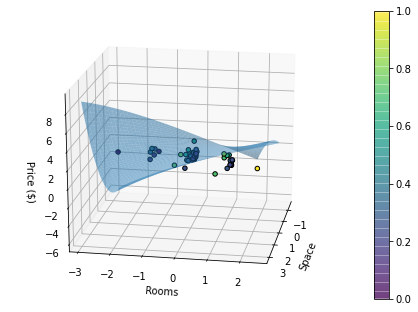

In [54]:
data_csv_norm = (data_csv-np.mean(data_csv, axis = 0))/np.std(data_csv, axis = 0)
#y_label = 'Price';
#y_index = np.where(headers == y_label)[0][0];
y = data_csv_norm[:,2];                      
X = data_csv_norm[:,0:-1];                 
m = data_csv_norm.shape[0]

percent_train = .6
random.shuffle(idx)
    
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_csv_norm[train_idx, 0:2];
X_test = data_csv_norm[test_idx, 0:2];
y_train = data_csv_norm[train_idx, 2];
y_test = data_csv_norm[test_idx, 2];

#=============================

# Polynomial regression model d=2, 3
for i in range(2):
    Xi_train = x_polynomial(X_train, i + 2)    
    Xi_test = x_polynomial(X_test, i + 2)

    theta = regression(Xi_train, y_train)
    J_train = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test = cost(theta, Xi_test, y_test)   

    # 3D plot
    print("3D plot: Polynomial degree %d"%(i+2),"\n")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)
    x_year = data_csv_norm[:, 0]
    y_month = data_csv_norm[:, 1]
    z_sale = data_csv_norm[:, 2]

    # 3. plot by using scatter
    p = ax.scatter(x_year,y_month, z_sale,edgecolors='black', c=data_csv_norm[:,2],alpha=1)

    # 4. set x, y, z label
    ax.set_xlabel('Space')
    ax.set_ylabel('Rooms')
    ax.set_zlabel('Price ($)')

    # plot observation
    x_series = np.linspace(min(data_csv_norm[:,0]), max(data_csv_norm[:,0]),len(y_csv))
    y_series = np.linspace(min(data_csv_norm[:,1]), max(data_csv_norm[:,1]),len(y_csv))

    x_mesh, y_mesh = np.meshgrid(x_series, y_series)
    
    if i == 0: # degree 2
        yy =(theta[0] +theta[1]*x_mesh.T+theta[2]*y_mesh+theta[3]*(x_mesh*y_mesh)+theta[4]*(y_mesh**2+x_mesh**2))
    else: # degree 3
        yy=(theta[0]+theta[1]*(x_mesh+y_mesh).T+theta[2]*x_mesh*y_mesh +theta[3]*x_mesh**2+theta[4]*y_mesh**2+theta[5]* y_mesh*x_mesh**2+theta[6]*y_mesh**3)
    print(yy.shape, x_mesh.shape)
    print("yy...:",yy[:1])
    print("x_mesh....:",x_mesh[:1])
    
    p = ax.plot_surface(x_mesh, y_mesh,yy,alpha=0.5)
    ax.view_init(elev=20, azim=10)
    plt.colorbar(p)
    plt.show()

**Conclusion:**

In this lab we are able to figure out the implementation of linear and polynomial regression. We see the different example of linear and polynomial regression. Thank you prof matt and Alisa for this lab work.